Polynomial Regression R² Score: 0.2289715971205667


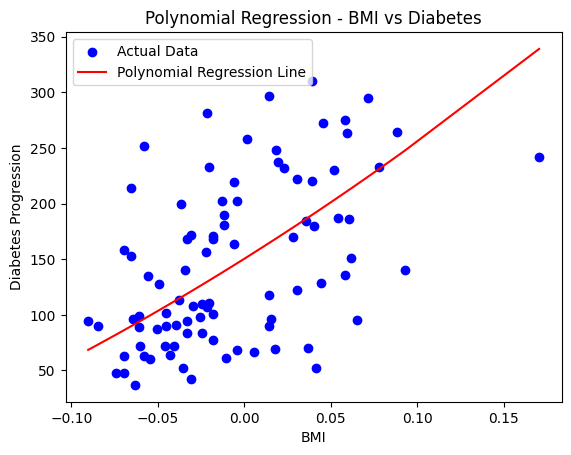

In [ ]:
#TASK6
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.datasets import load_diabetes

data = load_diabetes()
df = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target 


X = df[['bmi']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

y_pred_poly = poly_model.predict(X_test_poly)

r2_poly = r2_score(y_test, y_pred_poly)
print('Polynomial Regression R² Score:', r2_poly)

sorted_indices = np.argsort(X_test['bmi'].values.flatten())
X_test_sorted = X_test['bmi'].values.flatten()[sorted_indices]
y_pred_poly_sorted = y_pred_poly[sorted_indices]

plt.scatter(X_test['bmi'], y_test, color='blue', label='Actual Data')
plt.plot(X_test_sorted, y_pred_poly_sorted, color='red', label='Polynomial Regression Line')

plt.xlabel('BMI')
plt.ylabel('Diabetes Progression')
plt.title('Polynomial Regression - BMI vs Diabetes')
plt.legend()
plt.show()
